# Diabetes Analysis

Canderle Filippo, 27.09.2023 Evening

Dataset availability at: https://www.kaggle.com/datasets/aemyjutt/diabetesdataanslysis/data

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
file_path = 'diabetes.csv'
df = pd.read_csv(file_path)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


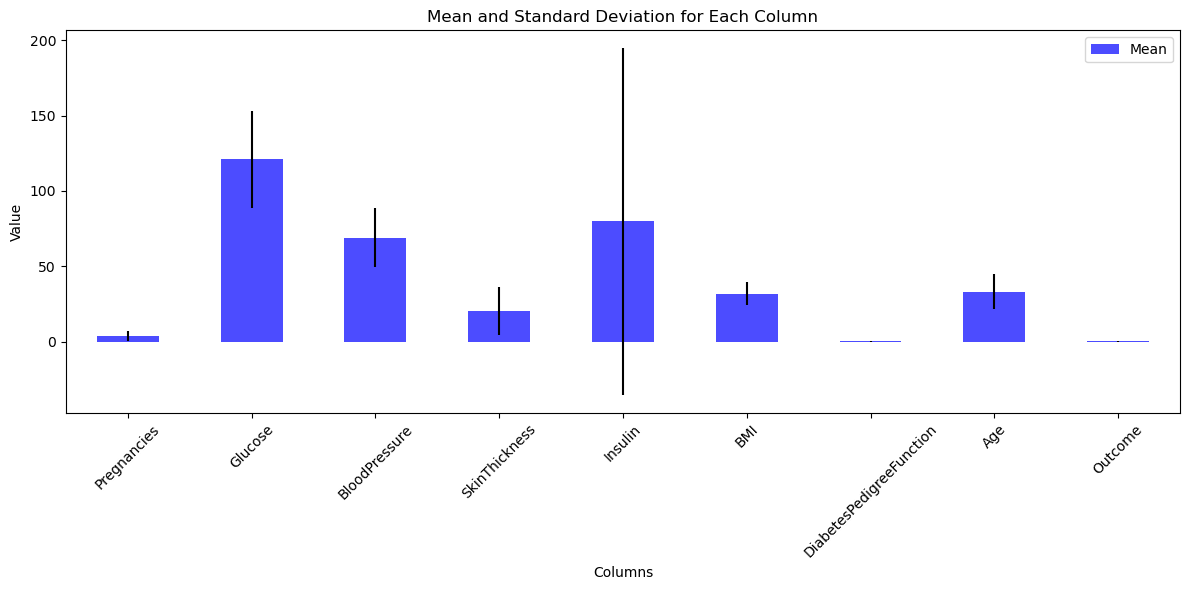

,Mean,Std Deviation,Min,Max
Pregnancies,3.845052,3.369578,0.000,17.00
Glucose,120.894531,31.972618,0.000,199.00
BloodPressure,69.105469,19.355807,0.000,122.00
SkinThickness,20.536458,15.952218,0.000,99.00
Insulin,79.799479,115.244002,0.000,846.00
BMI,31.992578,7.884160,0.000,67.10
DiabetesPedigreeFunction,0.471876,0.331329,0.078,2.42
Age,33.240885,11.760232,21.000,81.00
Outcome,0.348958,0.476951,0.000,1.00


In [9]:
means = df.mean()
std_devs = df.std()
mins=df.min()
maxs=df.max()

plt.figure(figsize=(12, 6))
means.plot(kind='bar', color='blue', alpha=0.7, yerr=std_devs)
plt.title('Mean and Standard Deviation for Each Column')
plt.xlabel('Columns')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(['Mean'])
plt.tight_layout()
plt.show()


results_df = pd.DataFrame({'Mean': means, 'Std Deviation': std_devs, 'Min': mins, 'Max': maxs})
results_df

I observe that the values with highest std deviation are glucose, skin thickness and insulin. 

Let's visually investigate the distribution of some of these variables.

/Users/filippo/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/filippo/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/filippo/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

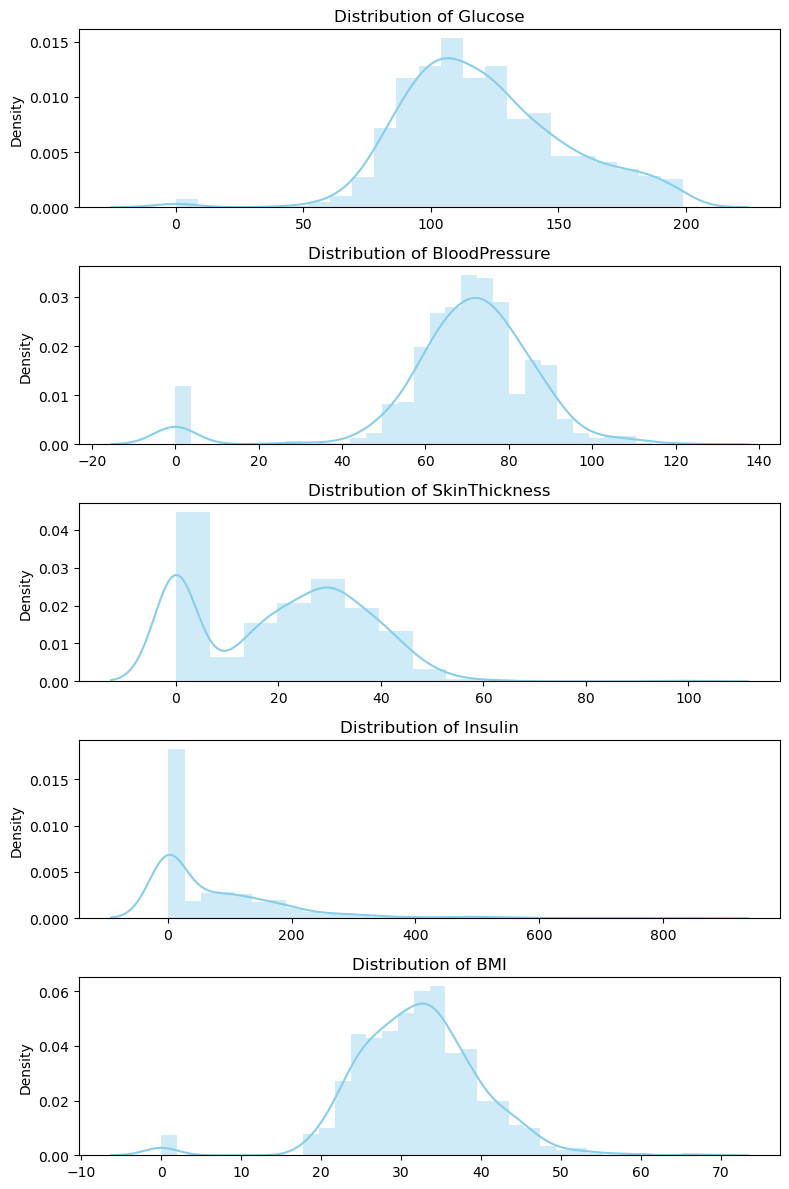

In [10]:
selected_columns = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"] 

fig, axes = plt.subplots(len(selected_columns), 1, figsize=(8, 12))

for i, column in enumerate(selected_columns):
    ax = axes[i]
    sns.distplot(df[column], ax=ax, hist=True, kde=True, color='skyblue')
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel('')
    ax.set_ylabel('Density')

plt.tight_layout()

plt.show()



The distributions seems to be pretty Gaussians, with some strage zeros as a minimun extrema.
I can guess that those values are wrong entries, because no one can have a 0 value of BMI, insulin level or other variables.
So I would like to try to exclude those "unreliable" rows and perform a new descriptive analysis.

In [12]:
df_updated = df.copy()
for column in selected_columns:
    df_updated = df_updated[df_updated[column] != 0]
    
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1


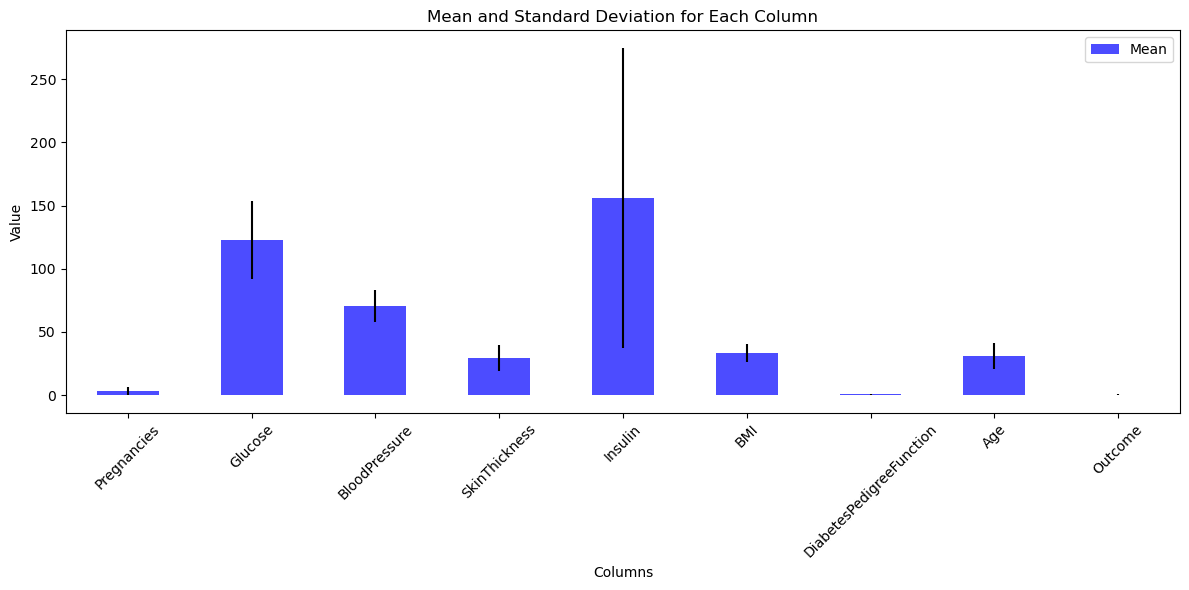

,Mean,Std Deviation,Min,Max
Pregnancies,3.301020,3.211424,0.000,17.00
Glucose,122.627551,30.860781,56.000,198.00
BloodPressure,70.663265,12.496092,24.000,110.00
SkinThickness,29.145408,10.516424,7.000,63.00
Insulin,156.056122,118.841690,14.000,846.00
BMI,33.086224,7.027659,18.200,67.10
DiabetesPedigreeFunction,0.523046,0.345488,0.085,2.42
Age,30.864796,10.200777,21.000,81.00
Outcome,0.331633,0.471401,0.000,1.00


In [13]:
means = df_updated.mean()
std_devs = df_updated.std()
mins=df_updated.min()
maxs=df_updated.max()

plt.figure(figsize=(12, 6))
means.plot(kind='bar', color='blue', alpha=0.7, yerr=std_devs)
plt.title('Mean and Standard Deviation for Each Column')
plt.xlabel('Columns')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(['Mean'])
plt.tight_layout()
plt.show()


results_df_updated = pd.DataFrame({'Mean': means, 'Std Deviation': std_devs, 'Min': mins, 'Max': maxs})
results_df_updated

/Users/filippo/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/filippo/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/filippo/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

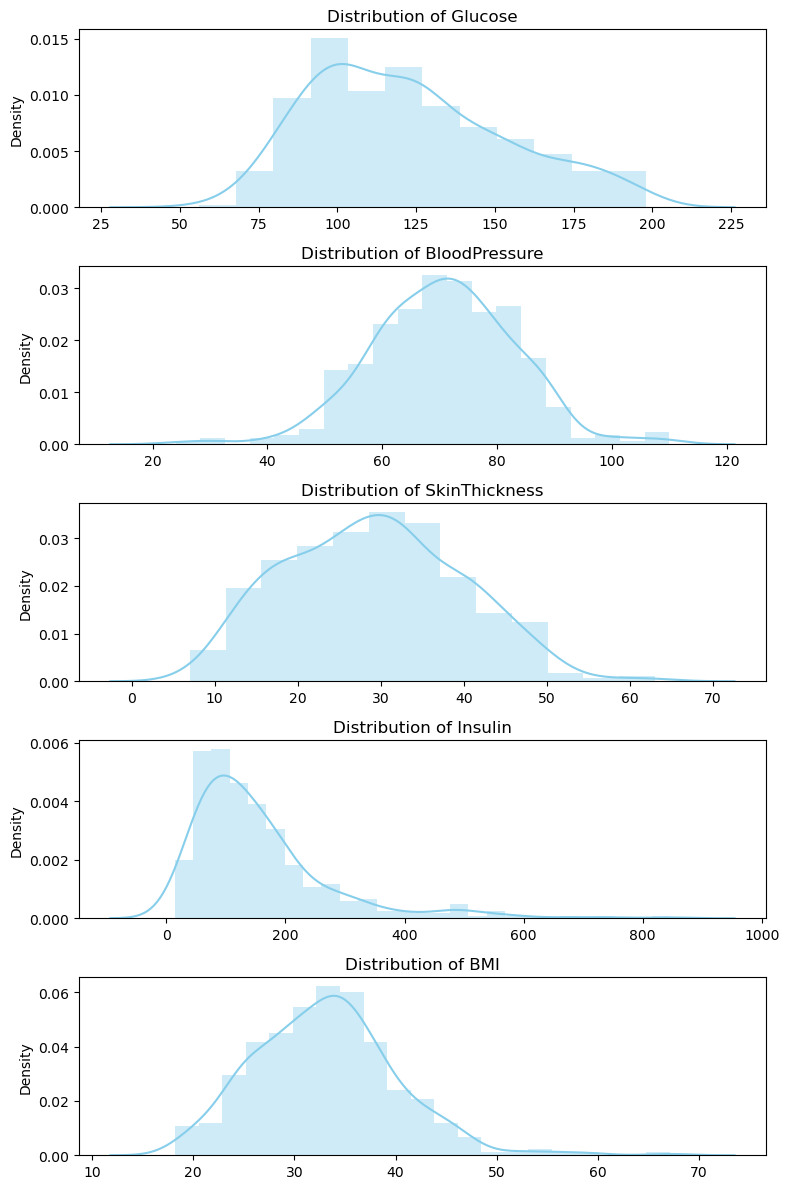

In [14]:
 fig, axes = plt.subplots(len(selected_columns), 1, figsize=(8, 12))

for i, column in enumerate(selected_columns):
    ax = axes[i]
    sns.distplot(df_updated[column], ax=ax, hist=True, kde=True, color='skyblue')
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel('')
    ax.set_ylabel('Density')

plt.tight_layout()

plt.show()

Now, let's analyze the correlation between the variables of our dataset.

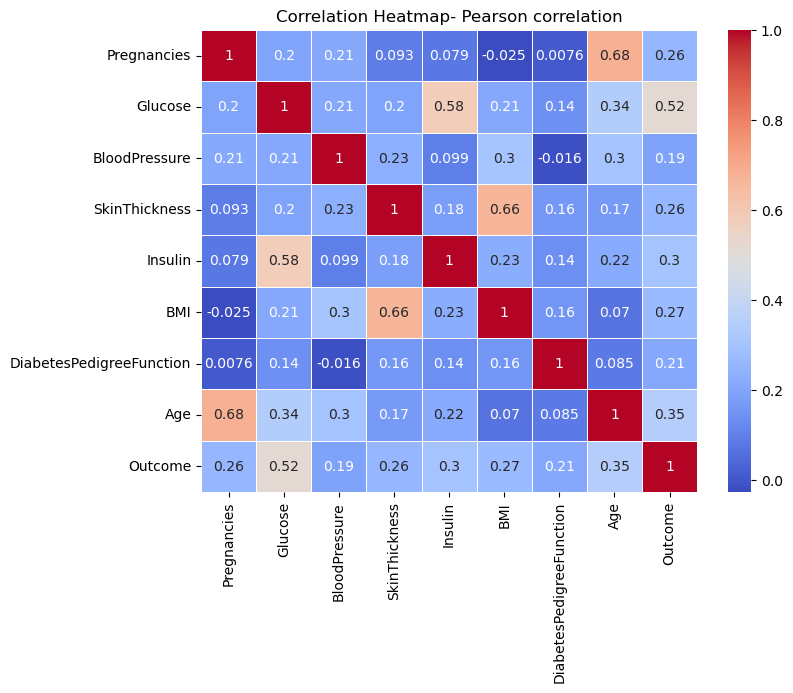

In [19]:
correlation_matrix = df_updated.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap- Pearson correlation')
plt.show()

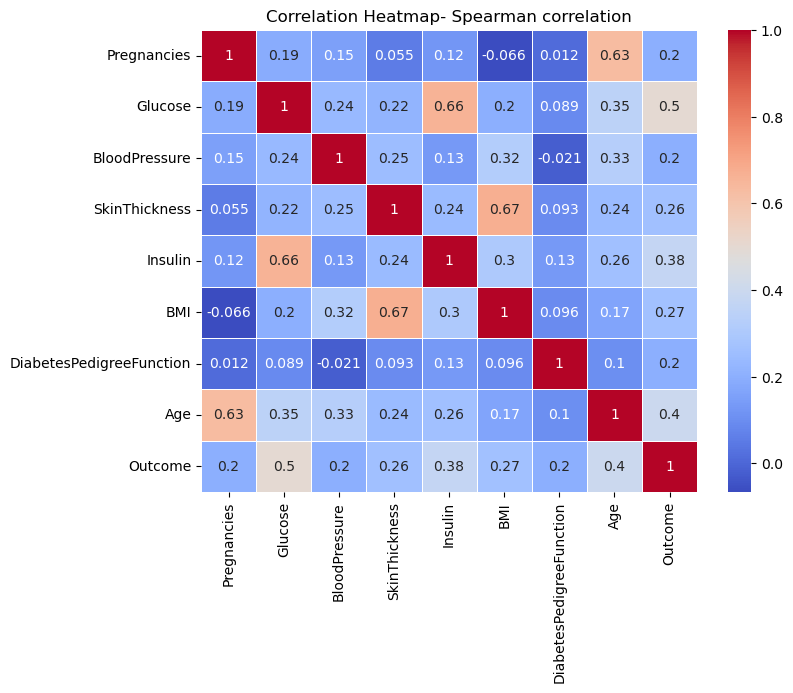

In [20]:
correlation_matrix = df_updated.corr(method='spearman')

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap- Spearman correlation')
plt.show()

We could say that we can exclude the strong correlations because are pretty obvious (++age-->++pregancies) or (++skin thickness-->++BMI)

And we can focus on values of spearman correlation between 0.3 and 0.5.

In [24]:
filtered_corr = correlation_matrix[(correlation_matrix >= 0.3) & (correlation_matrix <= 0.5)]

filtered_corr_df = filtered_corr.stack().reset_index().rename(columns={0: 'Correlation'})

unique_corr_df = filtered_corr_df.drop_duplicates(subset='Correlation', keep='first')

sorted_corr_df = unique_corr_df.sort_values(by='Correlation', ascending=False)

sorted_corr_df

,level_0,level_1,Correlation
1,Glucose,Outcome,0.498729
10,Age,Outcome,0.397355
5,Insulin,Outcome,0.375019
0,Glucose,Age,0.350305
3,BloodPressure,Age,0.329244
2,BloodPressure,BMI,0.317427
4,Insulin,BMI,0.300906


Now I want to compute PCA on my variables, firstly excluding my label "Outcome". The aim of this operation is in understanding if a reduced number of variables can imply better results in terms of ML predictions about the outcome.

In [25]:
column_to_exclude = 'Outcome'
df_excluded = df_updated.drop(column_to_exclude, axis=1) 

df_excluded

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
6,3,78,50,32,88,31.0,0.248,26
8,2,197,70,45,543,30.5,0.158,53
13,1,189,60,23,846,30.1,0.398,59
...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26
755,1,128,88,39,110,36.5,1.057,37
760,2,88,58,26,16,28.4,0.766,22
763,10,101,76,48,180,32.9,0.171,63


In [35]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_excluded)

n_components = 4 
pca = PCA(n_components=n_components)

principal_components = pca.fit_transform(scaled_data)

principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, n_components + 1)])

explained_variance_ratio = pca.explained_variance_ratio_

print(str(sum(explained_variance_ratio)*100)+"% of variablity retained.")

principal_df

78.38451982945014% of variablity retained.


,PC1,PC2,PC3,PC4
0,-2.059077,0.090379,-0.308834,-0.700160
1,0.781519,2.442463,2.212718,4.787571
2,-1.734034,0.171954,-0.505743,0.248924
3,3.227925,-0.464083,2.260795,-1.850913
4,3.223042,-1.125378,4.760714,-1.763163
...,...,...,...,...
387,2.759888,2.019638,1.347216,-2.552260
388,1.209445,0.955621,-0.613203,0.965233
389,-1.969793,0.314761,-0.189442,1.242245
390,2.378805,-2.086779,-2.007893,0.179543


### Machine Learning predictions

I want to Create a simple FFNN and fed it with the pca dataset and then with original dataset.

In [74]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

df_labels = df_updated[['Outcome']].copy()
X_train, X_test, y_train, y_test = train_test_split(principal_df, df_labels, test_size=0.2, random_state=42)

# Build a simple FFNN model
model = keras.Sequential([
    layers.Input(shape=(4,)),  
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  
])

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 32)                160       
                                                                 
 dense_41 (Dense)            (None, 1)                 33        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [75]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.2)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

Epoch 1/10
16/16 [==============================] - 0s 10ms/step - loss: 0.7048 - accuracy: 0.5080 - val_loss: 0.6963 - val_accuracy: 0.5397
Epoch 2/10
16/16 [==============================] - 0s 4ms/step - loss: 0.6565 - accuracy: 0.6280 - val_loss: 0.6514 - val_accuracy: 0.6190
Epoch 3/10
16/16 [==============================] - 0s 3ms/step - loss: 0.6167 - accuracy: 0.7280 - val_loss: 0.6155 - val_accuracy: 0.6984
Epoch 4/10
16/16 [==============================] - 0s 3ms/step - loss: 0.5850 - accuracy: 0.7400 - val_loss: 0.5866 - val_accuracy: 0.7143
Epoch 5/10
16/16 [==============================] - 0s 3ms/step - loss: 0.5585 - accuracy: 0.7600 - val_loss: 0.5613 - val_accuracy: 0.7778
Epoch 6/10
16/16 [==============================] - 0s 3ms/step - loss: 0.5369 - accuracy: 0.7800 - val_loss: 0.5399 - val_accuracy: 0.7619
Epoch 7/10
16/16 [==============================] - 0s 4ms/step - loss: 0.5191 - accuracy: 0.7800 - val_loss: 0.5224 - val_accuracy: 0.7619
Epoch 8/10
16/16 [=

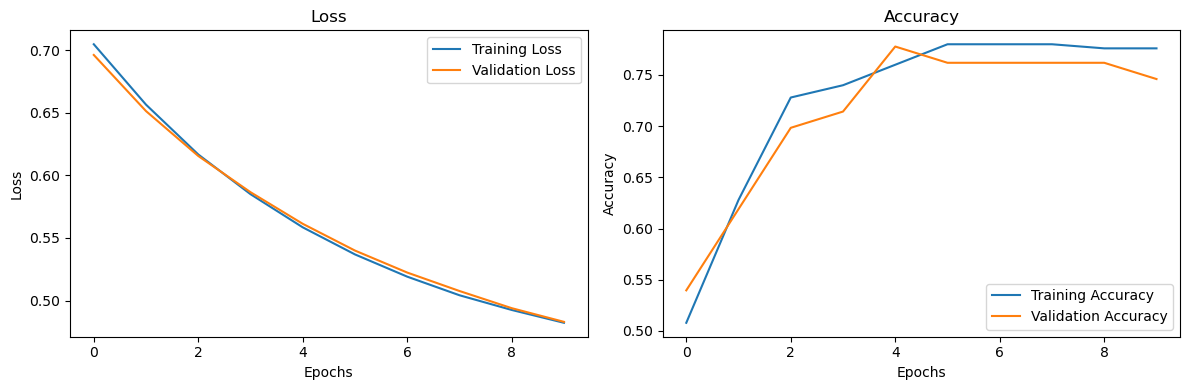

In [76]:

# Plot training loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [80]:
X_train, X_test, y_train, y_test = train_test_split(df_excluded, df_labels, test_size=0.2, random_state=42)

model1 = keras.Sequential([
    layers.Input(shape=(8,)),  
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  
])

model1.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 32)                288       
                                                                 
 dense_43 (Dense)            (None, 1)                 33        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [92]:
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history1 = model1.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.2)

test_loss, test_accuracy = model1.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

Epoch 1/20
16/16 [==============================] - 0s 9ms/step - loss: 0.5148 - accuracy: 0.7600 - val_loss: 0.5906 - val_accuracy: 0.7460
Epoch 2/20
16/16 [==============================] - 0s 4ms/step - loss: 0.4965 - accuracy: 0.7560 - val_loss: 0.7386 - val_accuracy: 0.6984
Epoch 3/20
16/16 [==============================] - 0s 3ms/step - loss: 0.4647 - accuracy: 0.7720 - val_loss: 0.5677 - val_accuracy: 0.7460
Epoch 4/20
16/16 [==============================] - 0s 3ms/step - loss: 0.4218 - accuracy: 0.7840 - val_loss: 0.5983 - val_accuracy: 0.6825
Epoch 5/20
16/16 [==============================] - 0s 3ms/step - loss: 0.4906 - accuracy: 0.7600 - val_loss: 0.6328 - val_accuracy: 0.7460
Epoch 6/20
16/16 [==============================] - 0s 5ms/step - loss: 0.5178 - accuracy: 0.7400 - val_loss: 0.5827 - val_accuracy: 0.6984
Epoch 7/20
16/16 [==============================] - 0s 3ms/step - loss: 0.4150 - accuracy: 0.7880 - val_loss: 0.5766 - val_accuracy: 0.7143
Epoch 8/20
16/16 [==

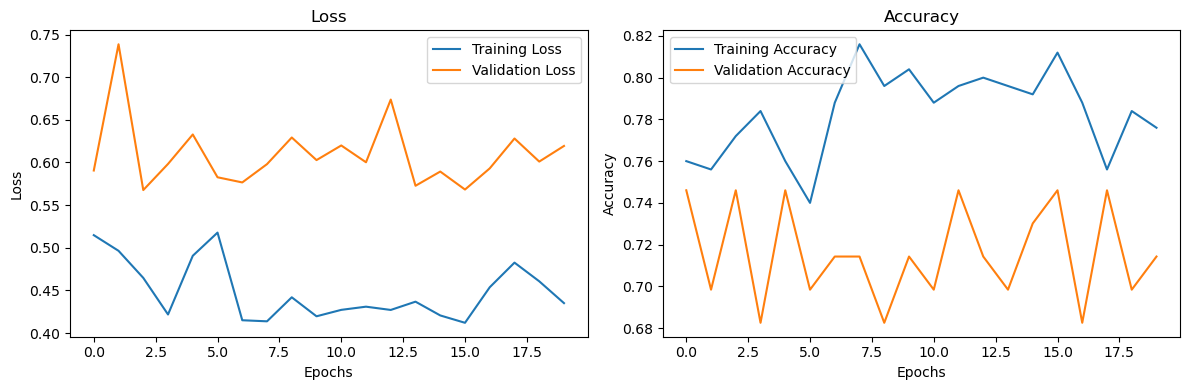

In [93]:
# Plot training loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

at this stage what we have is:

PCA Dataset--> Test Loss: 0.5397719144821167, Test Accuracy: 0.6962025165557861

Original Dataset-->Test Loss: 0.7837703824043274, Test Accuracy: 0.6455696225166321
        
So, with this particular FFNN we can state that dimensionality reduction on the original dataset can lead better performances